# Jungho John Ro Homework 4 WeatherPy
----

### Analysis
* It's not surprising to see that Max Temperature is higher when closer to the equator, however the cities in the southern hemisphere seem to have higher max temps than the northern hemisphere (December Solstice).   
* There is a cluster of cities that have a 100% humidity that lie between a latitude -20 and 10. 
* For cloudiness it is interesting to see majority of the cities lie in 4 major categories: 0%, 20%, 40%, and right around 80%. 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating Dataframe to store results needed for scatter plots
cities_df = pd.DataFrame({"Cities":cities})

# Creating Columns for the data needed in Dataframe
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"]= ""

cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bandarbeyla,,,,,,,,
1,namtsy,,,,,,,,
2,carquefou,,,,,,,,
3,hobart,,,,,,,,
4,jalu,,,,,,,,


In [4]:
# Print the Start of the Log of data
print("Beginning Data Retrieval")
print("--------------------------")

# The 
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

for index, row in cities_df.iterrows():
    city = row['Cities']
    cities = str(city)
    weather_url = base_url + "&appid=" + api_key + "&q=" + cities
    city_weather = requests.get(weather_url).json()
    try:
        cities_df.loc[index, "Cloudiness"] = city_weather["clouds"]["all"]
        cities_df.loc[index, "Country"] = city_weather["sys"]["country"]
        cities_df.loc[index, "Date"] =  city_weather["dt"]
        cities_df.loc[index, "Humidity"] = city_weather["main"]["humidity"]
        cities_df.loc[index, "Lat"] = city_weather["coord"]["lat"]
        cities_df.loc[index, "Lng"] = city_weather["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = city_weather["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = city_weather["wind"]["speed"]
        print(f'Processing Record | {city}')
    except:
        print("City not found. Skipping...")

print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record | bandarbeyla
Processing Record | namtsy
Processing Record | carquefou
Processing Record | hobart
Processing Record | jalu
Processing Record | rikitea
Processing Record | kapaa
Processing Record | punta arenas
Processing Record | kitimat
Processing Record | barrow
Processing Record | sola
Processing Record | castro
Processing Record | thompson
Processing Record | hermanus
Processing Record | mar del plata
Processing Record | hilo
Processing Record | lebu
Processing Record | kodiak
Processing Record | port-cartier
Processing Record | pisco
Processing Record | san cristobal
Processing Record | airai
Processing Record | ushuaia
Processing Record | puerto madero
Processing Record | broome
Processing Record | bambous virieux
Processing Record | port hedland
Processing Record | lavrentiya
Processing Record | sorong
Processing Record | noumea
Processing Record | anadyr
Processing Record | waddan
Processing Record | columbus

City not found. Skipping...
Processing Record | praia da vitoria
Processing Record | leh
Processing Record | florianopolis
City not found. Skipping...
Processing Record | ostersund
Processing Record | tilichiki
Processing Record | kilindoni
Processing Record | saint anthony
Processing Record | koslan
Processing Record | kota tinggi
Processing Record | puerto del rosario
Processing Record | punta gorda
Processing Record | altukhovo
Processing Record | malibu
Processing Record | ca mau
Processing Record | grand gaube
Processing Record | sisimiut
Processing Record | pryozerne
Processing Record | banda aceh
Processing Record | bilma
Processing Record | georgetown
City not found. Skipping...
Processing Record | san policarpo
Processing Record | springbok
Processing Record | broken hill
Processing Record | jieshi
Processing Record | hofn
Processing Record | baiyin
Processing Record | yar-sale
Processing Record | lasa
Processing Record | colares
Processing Record | harlingen
Processing Record

Processing Record | miles city
Processing Record | talara
Processing Record | birao
Processing Record | turukhansk
City not found. Skipping...
Processing Record | palkonda
Processing Record | surt
Processing Record | nouakchott
Processing Record | gornopravdinsk
Processing Record | rocha
Processing Record | estelle
City not found. Skipping...
City not found. Skipping...
Processing Record | iranshahr
Processing Record | zabol
Processing Record | kaeo
Processing Record | prince rupert
Processing Record | atyrau
Processing Record | suicheng
Processing Record | honningsvag
Processing Record | iquira
City not found. Skipping...
City not found. Skipping...
Processing Record | shubarshi
Processing Record | boguchany
Processing Record | kenai
Processing Record | sangmelima
Processing Record | vagur
Processing Record | bambanglipuro
Processing Record | dunedin
Processing Record | aleksandro-nevskiy
Processing Record | istok
--------------------------
Data Retrieval Complete
--------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df.to_csv('cities.csv')

cities_df.count()

Cities        597
Cloudiness    597
Country       597
Date          597
Humidity      597
Lat           597
Lng           597
Max Temp      597
Wind Speed    597
dtype: int64

In [6]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bandarbeyla,0,SO,1554338930,100,9.49,50.81,78.98,0.92
1,namtsy,0,RU,1554337800,53,62.72,129.66,26.6,6.71
2,carquefou,0,FR,1554339126,90,47.3,-1.49,37.4,4.7
3,hobart,20,AU,1554339080,47,-42.88,147.33,59,10.29
4,jalu,0,LY,1554338879,51,29.03,21.55,57.2,6.17


In [7]:
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"])
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"])

cities_df.dtypes

Cities         object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/Users/junghoro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


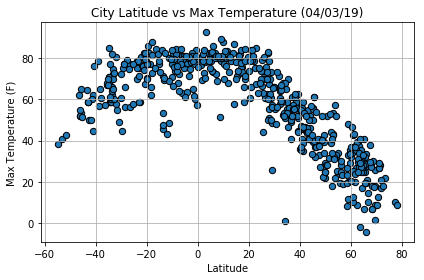

<Figure size 432x288 with 0 Axes>

In [8]:
cities_df.plot(kind="scatter", x="Lat", y="Max Temp", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Max Temperature (04/03/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

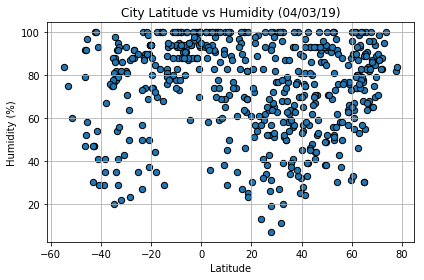

In [9]:
cities_df.plot(kind="scatter", x="Lat", y="Humidity", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Humidity (04/03/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

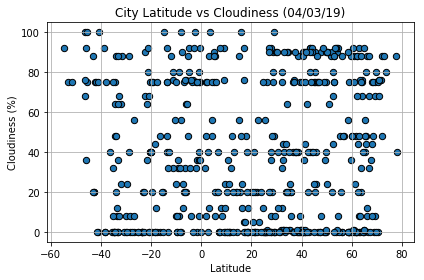

In [10]:
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Cloudiness (04/03/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

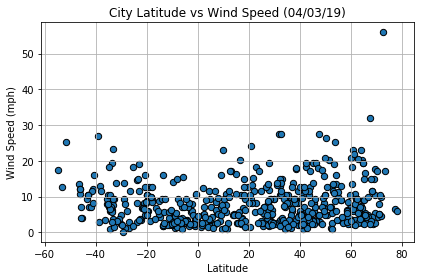

In [11]:
cities_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Wind Speed (04/03/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()